In [ ]:
#Unsupervsed learning algorithm, cluster based on similarities.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
#generate artifical data
from sklearn.datasets import make_blobs

In [5]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

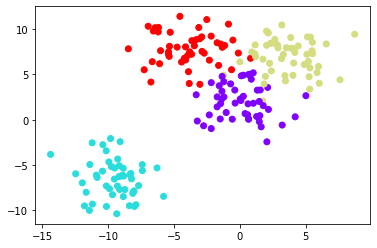

In [16]:
plt.scatter(data[0][:,0],data[0][:,1], c= data[1], cmap='rainbow')
#where c is the labeled data


In [ ]:
#Use sklearn to create a k means clustering algorithm

In [17]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=4)

In [20]:
kmeans.fit(data[0])
#fit to features

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

In [22]:
kmeans.labels_

array([3, 2, 1, 2, 2, 0, 2, 1, 2, 1, 3, 1, 2, 2, 3, 1, 2, 1, 0, 3, 0, 1,
       1, 0, 3, 0, 0, 1, 2, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 1, 0, 3, 3, 3,
       1, 2, 3, 1, 0, 1, 1, 3, 2, 1, 0, 3, 1, 1, 3, 2, 0, 2, 0, 3, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 3, 1, 1, 0, 2, 0, 1, 1, 1, 3,
       1, 0, 0, 0, 0, 1, 1, 0, 2, 3, 0, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 3, 3, 2, 0, 2, 3, 3, 2, 3, 1, 3, 1, 3, 1, 2, 3, 1, 0, 3, 3, 3,
       1, 0, 0, 3, 2, 3, 2, 1, 0, 2, 0, 3, 3, 2, 1, 0, 3, 3, 3, 3, 1, 2,
       1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 0, 3, 1, 2, 3, 1, 2, 1, 3, 2, 1, 3,
       2, 2, 0, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 0, 1, 2, 2,
       0, 1], dtype=int32)

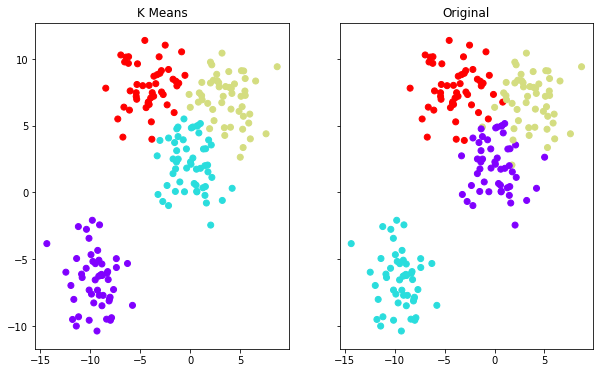

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,6))

#Algorithm
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1], c=kmeans.labels_, cmap='rainbow')

#Original data
ax2.set_title('Original')
ax2.scatter(data[0][:,0],data[0][:,1], c=data[1], cmap='rainbow')

In [ ]:
#Using Real world data
'''
Using KMeans Clustering to cluster Universities into to two groups, Private and Public.
Even though we have the labes for the data, we will not use it for the algorithm.
'''

In [31]:
uni_data = pd.read_csv('College_Data')

In [34]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.5+ KB


In [35]:
uni_data['Unnamed: 0'].head()

0    Abilene Christian University
1              Adelphi University
2                  Adrian College
3             Agnes Scott College
4       Alaska Pacific University
Name: Unnamed: 0, dtype: object

In [36]:
uni_data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#EDA

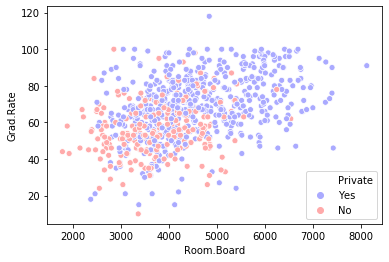

In [93]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=uni_data, hue='Private', palette='bwr')

In [ ]:
'''
Quite some noise in the centre. The higher the grad rate, the more likely it is a private school
The higher the room and board cost the more likely it is a private institute.
'''

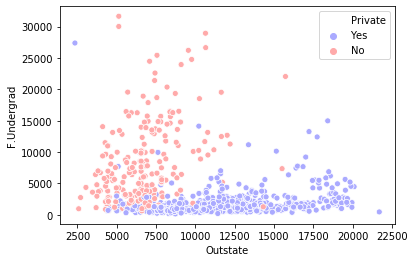

In [45]:
sns.scatterplot(x='Outstate', y='F.Undergrad', data=uni_data, hue='Private', palette='bwr')

In [ ]:
'''
Private institutes have less full time undergraduates compare to public institutes. The higher the 
out of state tutiton the more likely they are a private institute.
 We also see private institue outstate tends to start at around 4500 witht he exception of one.
'''

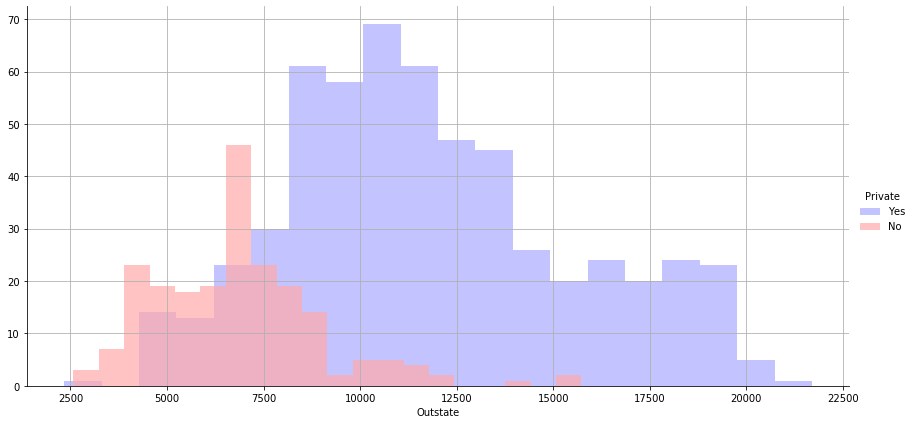

In [98]:
g = sns.FacetGrid(uni_data,hue='Private', palette='bwr', height=6, aspect=2)
g = (g.map(plt.hist, 'Outstate', bins=20, alpha= 0.7).add_legend())
plt.grid()

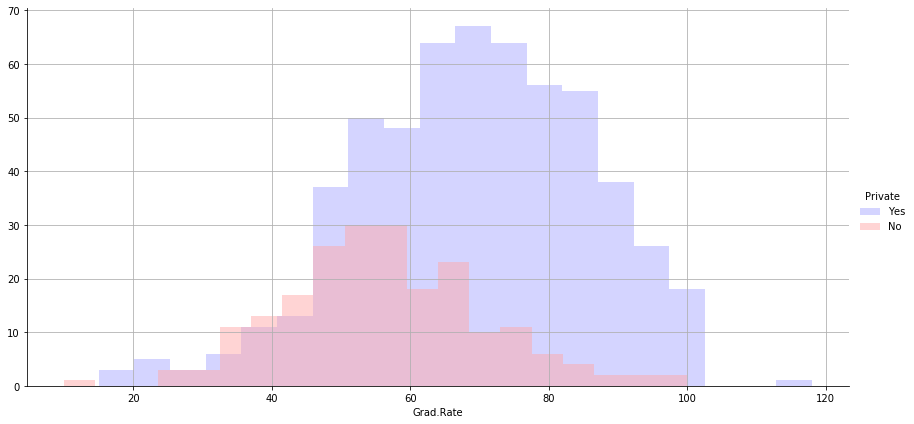

In [100]:
g = sns.FacetGrid(uni_data,hue='Private', palette='bwr', height=6, aspect=2)
g = (g.map(plt.hist, 'Grad.Rate', bins=20, alpha= 0.5 ).add_legend())
plt.grid()

In [72]:
#Only a private school has a grad rate higher than 100%.
uni_data[uni_data['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [75]:
x = uni_data[uni_data['Grad.Rate'] <= 100]

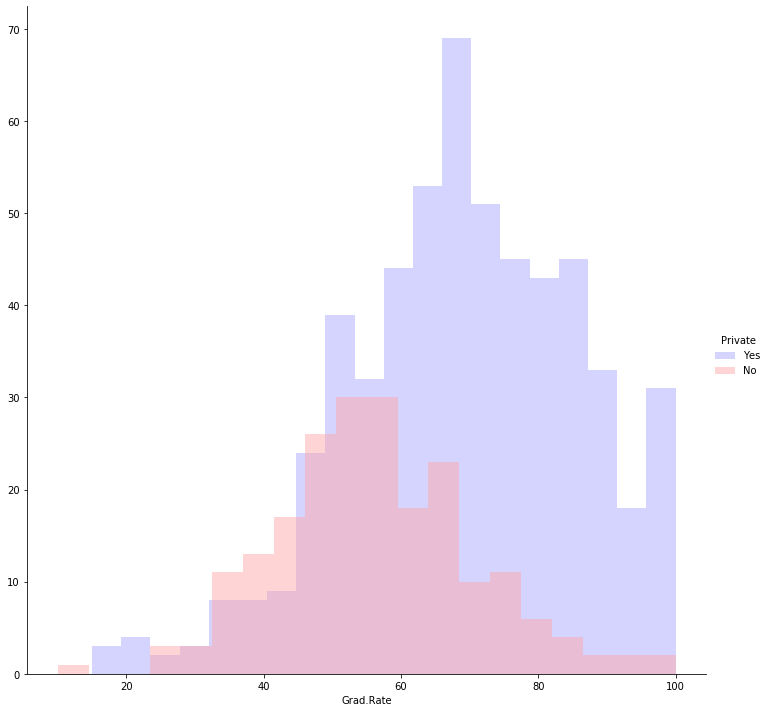

In [76]:
g = sns.FacetGrid(x,hue='Private', palette='bwr', height=10)
g = (g.map(plt.hist, 'Grad.Rate', bins=20, alpha= 0.5 ).add_legend())

In [101]:
uni_data['Grad.Rate']['Cazenovia College'] = 100

/Users/kaykay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# K Means Cluster Creation

In [79]:
from sklearn.cluster import KMeans

In [80]:
uni_cluster = KMeans(n_clusters=2)
#In real world, we wont know what value to choose so accurately.

In [111]:
uni_cluster.fit(uni_data.drop(columns=['Private','Unnamed: 0'], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
uni_cluster.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01],
       [1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01, 7.93721973e-01]])

In [ ]:
#Evaluation because we know the labeled data

In [102]:
def converter(private):
    if private == 'Yes':
        return 1
    else:
        return 0
    

In [105]:
uni_data['Cluster'] = uni_data['Private'].apply(converter)

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

In [114]:
print(confusion_matrix(uni_data['Cluster'], uni_cluster.labels_))
print('\n')
print(classification_report(uni_data['Cluster'], uni_cluster.labels_))

[[ 74 138]
 [ 34 531]]


              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777



In [ ]:
#It shows how well the Kmeans clustering worked without being given any labels because it only used the 
#features to classify the data into two groups.